In [551]:
from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import *
from sklearn import preprocessing

In [976]:
data = np.loadtxt('../Data/vardQ_.6f.csv',delimiter=',') # skip row for column names

In [977]:
test_ind = np.array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 83])

train_ind = np.array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81])

secondary_ind = np.array([ 84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
       123])

In [978]:
x_train = data[:, 0][train_ind]
y_train = data[:, 1][train_ind]

x_test = data[:, 0][test_ind]
y_test = data[:, 1][test_ind]

x_stest = data[:, 0][secondary_ind]
y_stest = data[:, 1][secondary_ind]

regressor = SVR()
# regressor.fit(x_train.reshape(-1, 1),y_train)

In [986]:
# Create the random grid
param_grid = {'C': np.logspace(-5, 0, base=10, num=1000), 
              'kernel': ['linear','rbf', 'sigmoid'],
              'gamma': np.logspace(-5, 0, base=10, num=50),
              'epsilon': np.logspace(-5, 0, base=10, num=50)} 
print(y_train)
folds = KFold(n_splits = 4, shuffle = True, random_state = 42)
model= RandomizedSearchCV(estimator= regressor, n_iter = 10000, cv=folds, param_distributions = param_grid ,scoring="neg_mean_squared_error", random_state=42,verbose=2, return_train_score=True, n_jobs = -1)
print(model)
model.fit(x_train.reshape(-1, 1),y_train)

[3.334454 3.156549 3.031004 2.939519 2.896526 2.856729 2.932981 2.896526
 2.747412 3.007321 2.939519 2.934498 2.850646 2.863917 2.870404 2.847573
 2.790285 2.984977 2.846337 2.789581 2.477121 2.641474 2.647383 2.708421
 2.678518 2.683947 2.693727 2.663701 2.689309 2.721811 2.663701 2.670246
 2.697229 2.691965 2.716003 2.665581 2.679428 2.661813 2.632457 2.664642
 2.687529]
RandomizedSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=SVR(C=82.5925925925926,
                                 epsilon=0.08217387387387387,
                                 gamma=0.04113693693693694),
                   n_iter=10000, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-05, 1.01159111e-05, 1.02331658e-05, 1.03517796e-05,
       1.04717682e-05, 1.05931476e-05, 1.07159340e-05, 1.08401436e-05,
       1.09657929e-05, 1.1...
       1.84206997e-02, 2.32995181e-02, 2.94705170e-02, 3.72759372e-02,
       4.71486636e-02, 5.96362332e-02, 7.543

RandomizedSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=SVR(C=82.5925925925926,
                                 epsilon=0.08217387387387387,
                                 gamma=0.04113693693693694),
                   n_iter=10000, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-05, 1.01159111e-05, 1.02331658e-05, 1.03517796e-05,
       1.04717682e-05, 1.05931476e-05, 1.07159340e-05, 1.08401436e-05,
       1.09657929e-05, 1.1...
       1.84206997e-02, 2.32995181e-02, 2.94705170e-02, 3.72759372e-02,
       4.71486636e-02, 5.96362332e-02, 7.54312006e-02, 9.54095476e-02,
       1.20679264e-01, 1.52641797e-01, 1.93069773e-01, 2.44205309e-01,
       3.08884360e-01, 3.90693994e-01, 4.94171336e-01, 6.25055193e-01,
       7.90604321e-01, 1.00000000e+00]),
                                        'kernel': ['linear', 'rbf', 'sigmoid']},
                   random_state=42, return_train_score=True,
                   scori

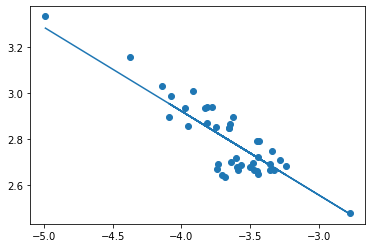

In [987]:
plt.scatter(x_train,y_train)
plt.plot(x_train, model.predict(x_train.reshape(-1,1)))

In [988]:
print("Best RMS score: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best RMS score:  -0.006469022324891943
Best hyperparameters:  {'kernel': 'linear', 'gamma': 0.000339322177189533, 'epsilon': 0.05963623316594643, 'C': 0.29817722900196736}


In [989]:
regressor = SVR(kernel='rbf',epsilon=0.08217387387387387, gamma = 0.04113693693693694, C=82.5925925925926)
regressor.fit(x_train.reshape(-1, 1),y_train)

SVR(C=82.5925925925926, epsilon=0.08217387387387387, gamma=0.04113693693693694)

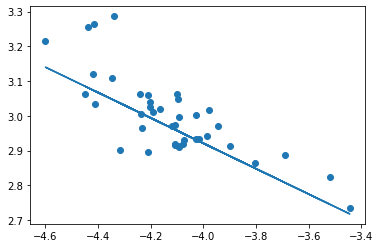

In [990]:
plt.scatter(x_stest,y_stest)
plt.plot(x_stest, model.predict(x_stest.reshape(-1,1)))

In [991]:
print("RMSE: ", np.sqrt(np.average((10**regressor.predict(x_test.reshape(-1,1)) - 10**y_test)**2))) # 1 is the best score

RMSE:  126.29321797480753


In [992]:
print("RMSE: ", np.sqrt(np.average((10**regressor.predict(x_stest.reshape(-1,1)) - 10**y_stest)**2))) # 1 is the best score

RMSE:  205.76221965781912


In [510]:
data = np.loadtxt('../Data/features.csv',delimiter=',', skiprows=1) # skip row for column names

In [744]:
cycle_life = np.log10(data[:,0])
DeltaQ_logVar = data[:,1]
DeltaQ_Min = np.log10(-data[:, 2])
DeltaQ_Skew = data[:, 3]
DeltaQ_Kurt = data[:, 4]
QD_Max_2 = data[:, 5]
QD_2 = data[:, 6]
slope_capacity_fade_2_100 = data[:, 7]
intercept_capacity_fade_2_100 = data[:, 8]
slope_capacity_fade_91_100 = data[:, 9]
intercept_capacity_91_100 = data[:, 10]
init_avg_charge_time = data[:, 11]
avg_T = data[:, 12]
min_IR = data[:, 13]
IR_100_2 = data[:, 14]

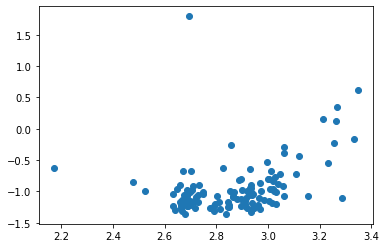

In [774]:
plt.scatter(cycle_life, DeltaQ_Kurt)

In [969]:
X = np.array([DeltaQ_logVar, DeltaQ_Min, QD_Max_2, IR_100_2]).transpose()

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

x_train = X[train_ind]
y_train = cycle_life[train_ind]

x_test = X[test_ind]
y_test = cycle_life[test_ind]

x_stest = X[secondary_ind]
y_stest = cycle_life[secondary_ind]

print(np.average(X[:,0]))

1.3788253692925331e-16


In [970]:
# Create the random grid
regressor = SVR()

param_grid = {'C': np.logspace(-5, 1, base=10, num=1000), 
              'kernel': ['rbf', 'sigmoid'],
              'gamma': np.logspace(-5, 0, base=10, num=50),
              'epsilon':np.logspace(-5, 0, base=10, num=50)} 
print(y_train)
folds = KFold(n_splits = 4, shuffle = True, random_state = 42)
model= RandomizedSearchCV(estimator= regressor, n_iter = 10000, cv=folds, param_distributions = param_grid ,scoring="neg_mean_squared_error", random_state=42,verbose=2, return_train_score=True, n_jobs = -1)
print(model)
model.fit(x_train,y_train)

[3.33445375 3.15654915 3.03100428 2.93951925 2.89652622 2.85672889
 2.93298082 2.89652622 2.74741181 3.00732095 2.93951925 2.93449845
 2.85064624 2.86391738 2.87040391 2.84757266 2.79028516 2.98497713
 2.84633711 2.78958071 2.47712125 2.64147411 2.64738297 2.7084209
 2.67851838 2.68394713 2.69372695 2.66370093 2.68930886 2.72181062
 2.66370093 2.67024585 2.69722934 2.6919651  2.71600334 2.66558099
 2.6794279  2.66181269 2.63245729 2.66464198 2.68752896]
RandomizedSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=SVR(), n_iter=10000, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-05, 1.01392541e-05, 1.02804473e-05, 1.04236067e-05,
       1.05687597e-05, 1.07159340e-05, 1.08651577e-05, 1.10164595e-05,
       1.11698682e-05, 1.13254132e-05, 1.14831241e-05, 1.16430313e-05,
       1.18051653e-05, 1.19695570e-05,...
       1.84206997e-02, 2.32995181e-02, 2.94705170e-02, 3.72759372e-02,
       4.71486636e-02, 5.96362332e-02,

RandomizedSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=SVR(), n_iter=10000, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-05, 1.01392541e-05, 1.02804473e-05, 1.04236067e-05,
       1.05687597e-05, 1.07159340e-05, 1.08651577e-05, 1.10164595e-05,
       1.11698682e-05, 1.13254132e-05, 1.14831241e-05, 1.16430313e-05,
       1.18051653e-05, 1.19695570e-05,...
       1.84206997e-02, 2.32995181e-02, 2.94705170e-02, 3.72759372e-02,
       4.71486636e-02, 5.96362332e-02, 7.54312006e-02, 9.54095476e-02,
       1.20679264e-01, 1.52641797e-01, 1.93069773e-01, 2.44205309e-01,
       3.08884360e-01, 3.90693994e-01, 4.94171336e-01, 6.25055193e-01,
       7.90604321e-01, 1.00000000e+00]),
                                        'kernel': ['rbf', 'sigmoid']},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error', verbose=2)

In [971]:
print("Best RMS score: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best RMS score:  -0.005880171398882989
Best hyperparameters:  {'kernel': 'rbf', 'gamma': 0.0071968567300115215, 'epsilon': 0.001757510624854793, 'C': 6.513490946272796}


In [972]:
regressor = SVR(kernel=model.best_params_['kernel'],epsilon=model.best_params_['epsilon'], 
                gamma = model.best_params_['gamma'], C=model.best_params_['C'])
regressor.fit(x_train,y_train)

SVR(C=6.513490946272796, epsilon=0.001757510624854793,
    gamma=0.0071968567300115215)

In [973]:
print("RMSE: ", np.sqrt(np.average((10**regressor.predict(x_train) - 10**y_train)**2))) 

RMSE:  102.0384278544135


In [974]:
print("RMSE: ", np.sqrt(np.average((10**regressor.predict(x_test) - 10**y_test)**2))) 
# 1 is the best score

RMSE:  123.06952928693579


In [975]:
print("RMSE: ", np.sqrt(np.average((10**regressor.predict(x_stest) - 10**y_stest)**2))) 
# 1 is the best score

RMSE:  186.90612933452698
